In [1]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

dataset = pd.read_csv("fraud_oracle.csv")

#removing unrelated variables from the data set
updated_ds = dataset.drop(["Month","WeekOfMonth","DayOfWeek", "Make", "DayOfWeekClaimed", "MonthClaimed", "WeekOfMonthClaimed", 
                   "RepNumber", "Deductible", "AgeOfPolicyHolder","PastNumberOfClaims","PolicyNumber", "AddressChange_Claim","NumberOfCars","Year"],axis =1)

#drop fetures that identified as unimportant by feature extraction method using R-Studio

updated_ds_new = updated_ds.drop(["AccidentArea", "AgentType", "DriverRating", "NumberOfSuppliments","PoliceReportFiled","VehiclePrice"],axis =1)


# For Days_Policy_Accident it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'more than 30', 'Days_Policy_Accident'] = '31'

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'none', 'Days_Policy_Accident'] = '0'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '8 to 15', 'Days_Policy_Accident'] = '11.5'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '15 to 30', 'Days_Policy_Accident'] = '22.5'

# mean of range 1 t0 7 ->  1+2+3+4+5+6+7/7 = 4 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '1 to 7', 'Days_Policy_Accident'] = '4'


# For Days_Policy_Claim it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'more than 30', 'Days_Policy_Claim'] = '31'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '15 to 30', 'Days_Policy_Claim'] = '22.5'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '8 to 15', 'Days_Policy_Claim'] = '11.5'

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'none', 'Days_Policy_Claim'] = '0'

# For AgeOfVehicle it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '7 years', 'AgeOfVehicle'] = '7'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'more than 7', 'AgeOfVehicle'] = '8'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '6 years', 'AgeOfVehicle'] = '6'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '5 years', 'AgeOfVehicle'] = '5'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'new', 'AgeOfVehicle'] = '0'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '4 years', 'AgeOfVehicle'] = '4'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '3 years', 'AgeOfVehicle'] = '3'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '2 years', 'AgeOfVehicle'] = '2'

# changing datatypes of the dataset as per the above transformations
updated_ds_new['Days_Policy_Accident'] = updated_ds_new['Days_Policy_Accident'].astype('float')
updated_ds_new['Days_Policy_Claim'] = updated_ds_new['Days_Policy_Claim'].astype('float')
updated_ds_new['AgeOfVehicle'] = updated_ds_new['AgeOfVehicle'].astype('float')

updated_ds_new.dtypes

# perform OHE for categorical data 
one_hot_encoded_data = pd.get_dummies(updated_ds_new, columns = ['Sex', 'MaritalStatus','Fault','PolicyType', 'VehicleCategory','WitnessPresent','BasePolicy'])





Results Using Gini Index:
Predicted values:
[1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1
 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1
 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0
 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1
 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0
 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0

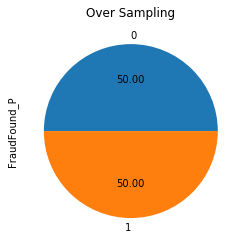

In [2]:
## Applying Decision Tree for Predict Frauds in Vehicle Insurance Claim
#https://www.geeksforgeeks.org/decision-tree-implementation-python/.
  
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
  
# Function importing Dataset
def importdata():
    data = one_hot_encoded_data
    return data
  
# Function to split the dataset
def splitdataset(data):
  
    # Separating the target variabl
    
    X = one_hot_encoded_data.drop("FraudFound_P", axis=1)
    Y = one_hot_encoded_data["FraudFound_P"]


    ros = RandomUnderSampler(sampling_strategy = 1)
    x_res, y_res = ros.fit_resample(X,Y)

    ax = y_res.value_counts().plot.pie(autopct = '%.2f')
    _=ax.set_title("Over Sampling")
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    x_res, y_res, test_size = 0.3, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test
      
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
  
# Driver code
def main():
      
    # Building Phase
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()